In [1]:
import numpy as np
import matplotlib.pyplot as plt

(-0.5, 1.5)

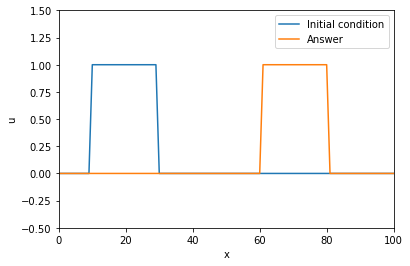

In [2]:
Num_stencil = 101
x_array = np.arange(Num_stencil)
u_array = np.where(((x_array >= 30) | (x_array < 10)), 0.0, 1.0)
u_lower_boundary = 0.0
u_upper_boundary = 0.0
Time_step = 250
Delta_x = max(x_array) / (Num_stencil - 1)
c = 1
Delta_t = 0.2

CFL = c * Delta_t / Delta_x
total_movement = c * Delta_t * (Time_step + 1)

exact_u_array = np.where(((x_array >= 30 + total_movement) | (x_array < 10 + total_movement)), 0.0, 1.0)
plt.plot(x_array, u_array, label="Initial condition")
plt.plot(x_array, exact_u_array, label="Answer")
plt.legend(loc="upper right")
plt.xlabel("x")
plt.ylabel("u")
plt.xlim(0, max(x_array))
plt.ylim(-0.5,1.5)

In [23]:
u_array[0:1]

array([0.])

(-0.5, 1.5)

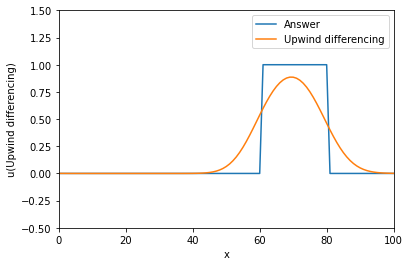

In [24]:
u_upwind = u_array.copy()

for n in range(Time_step):
    u_old = u_upwind.copy()
    u_upwind[0:1] = u_old[0] - CFL * (u_old[1] - u_lower_boundary)
    for j in range(Num_stencil):
        u_upwind[j: j+1] = u_old[j] - CFL * (u_old[j] - u_old[j-1])
        
plt.plot(x_array, exact_u_array, label="Answer")
plt.plot(x_array, u_upwind, label="Upwind differencing")
plt.legend(loc="upper right")
plt.xlabel("x")
plt.ylabel("u(Upwind differencing)")
plt.xlim(0, max(x_array))
plt.ylim(-0.5,1.5)
    

In [90]:
%matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


In [91]:
Num_stencil = 101
x_array = np.arange(Num_stencil)
u_array = np.where(((x_array >= 30) | (x_array < 10)), 0.0, 1.0)

In [92]:
x_array

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

In [93]:
u_array

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [96]:
Delta_x = max(x_array) / (Num_stencil - 1)
Delta_t = 1
c = 1
CFL = c * Delta_t / Delta_x

In [97]:
CFL

1.0

<IPython.core.display.Javascript object>


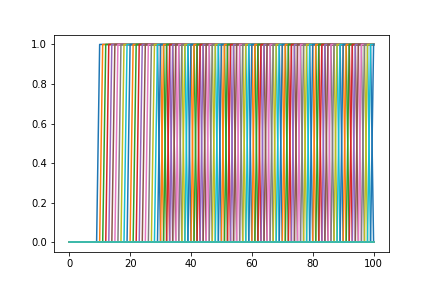

In [100]:
ims = []
Time_step = 100
for t in range(Time_step):
    total_movement = c * Delta_t * t
    exact_u_array = np.where(((x_array >= 30 + total_movement) | (x_array < 10 + total_movement)), 0.0, 1.0)
    im = plt.plot(x_array, exact_u_array)[0]
    #print(type(im))
    ims.append(im)

<IPython.core.display.Javascript object>


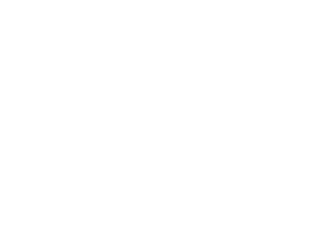

In [86]:
fig = plt.figure()

ani = animation.ArtistAnimation(fig, ims, interval = 100)
plt.show()

<IPython.core.display.Javascript object>


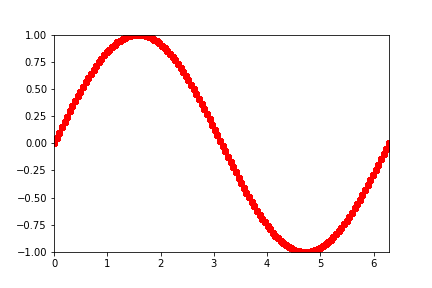

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = plt.plot([], [], 'ro')

def init():
    ax.set_xlim(0, 100)
    ax.set_ylim(-1.5, 1.5)
    return ln,

def update(frame):
    xdata.append(frame)
    ydata.append(np.sin(frame))
    ln.set_data(xdata, ydata)
    return ln,

ani = FuncAnimation(fig, update, frames=np.linspace(0, 2 * np.pi, 128),
                    init_func=init, blit=True, interval=50)

HTML(ani.to_jshtml())